In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [23]:
university = pd.read_csv('Universities.csv')

In [24]:
university

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [25]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [28]:
scaled = MinMaxScaler().fit_transform(university.iloc[:,1:])


In [29]:
scaled = pd.DataFrame(scaled,columns=[['SAT','Top10','Accept','SFRatio','Expenses','GradRate']])


In [30]:
scaled

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


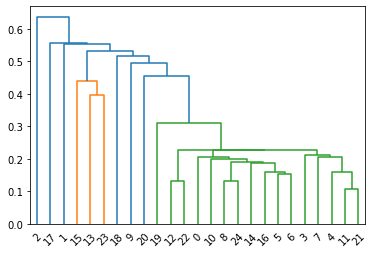

In [32]:
dendogram = sch.dendrogram(sch.linkage(scaled, method='single'))

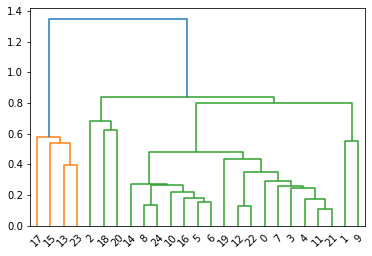

In [33]:
dendogram = sch.dendrogram(sch.linkage(scaled, method='average'))

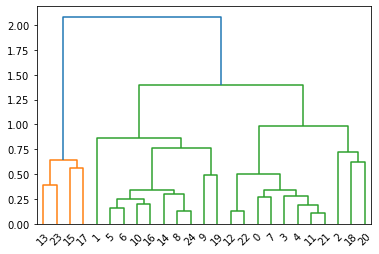

In [34]:
dendogram = sch.dendrogram(sch.linkage(scaled, method='complete'))

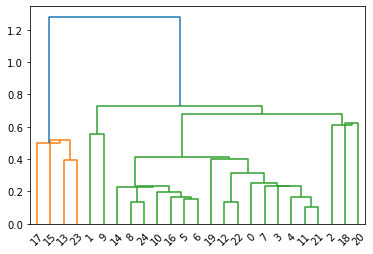

In [35]:
dendogram = sch.dendrogram(sch.linkage(scaled, method='centroid'))

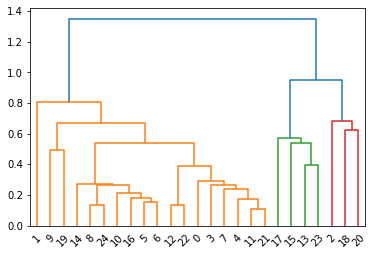

In [37]:
dendogram = sch.dendrogram(sch.linkage(scaled, method='weighted'))

In [49]:
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'ward')
  model_clt = cluster_H.fit(scaled)
  label = model_clt.labels_
  sil_coeff = silhouette_score(scaled,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))


For cluster= 2, Silhouette Coefficient is 0.5521594686991348
For cluster= 3, Silhouette Coefficient is 0.29296263039983844
For cluster= 4, Silhouette Coefficient is 0.2599652062010792
For cluster= 5, Silhouette Coefficient is 0.30783870841795447


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')


In [57]:
y_hc = hc.fit_predict(scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [59]:
university['Clusters'] = Clusters['Clusters']

In [60]:
university

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
